# Redes Neuronales Artificiales

## Metodología
Los pasos a seguir para alcanzar el objetivo son los siguientes:

1. Importación de la base de datos.
2. Análisis de las variables para identificar el tipo de dato.
3. Verificación de valores `NaN` o Nulos.
4. Distribución de las variables.
5. Cálculo de la matriz de correlación.
6. Procesamiento de datos.
7. Resultados y discusión.

## Configuración
### Importación de librerías
Importamos todas las librerías necesarias para trabajar

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.layers import Input
from sklearn import preprocessing
from keras.models import Sequential 
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

2024-07-26 03:36:14.013433: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-26 03:36:15.322509: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# 1. Importación de la base de datos
dataset = pd.read_csv('datasets/ground_source_heat_pump.csv')
dataset.head()

,HEM,STC,VWD,WD,UT,WFR,WTD,HTR
0,Release,1.41,100.0,180,3.0,1.15,4.04,53.9
1,Release,1.41,125.0,180,3.0,1.15,4.86,52.0
2,Extraction,1.41,100.0,180,3.0,1.15,3.18,42.4
3,Extraction,1.41,125.0,180,3.0,1.15,3.82,40.7
4,Release,1.46,85.0,130,2.8,1.19,4.19,66.6


In [3]:
# 2. Análisis de las variables para identificar el tipo de dato
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HEM     112 non-null    object 
 1   STC     112 non-null    float64
 2   VWD     112 non-null    float64
 3   WD      112 non-null    int64  
 4   UT      112 non-null    float64
 5   WFR     112 non-null    float64
 6   WTD     112 non-null    float64
 7   HTR     112 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 7.1+ KB


In [4]:
# 3. Verificación de valores NaN o nulos
dataset.isnull().sum()

HEM    0
STC    0
VWD    0
WD     0
UT     0
WFR    0
WTD    0
HTR    0
dtype: int64

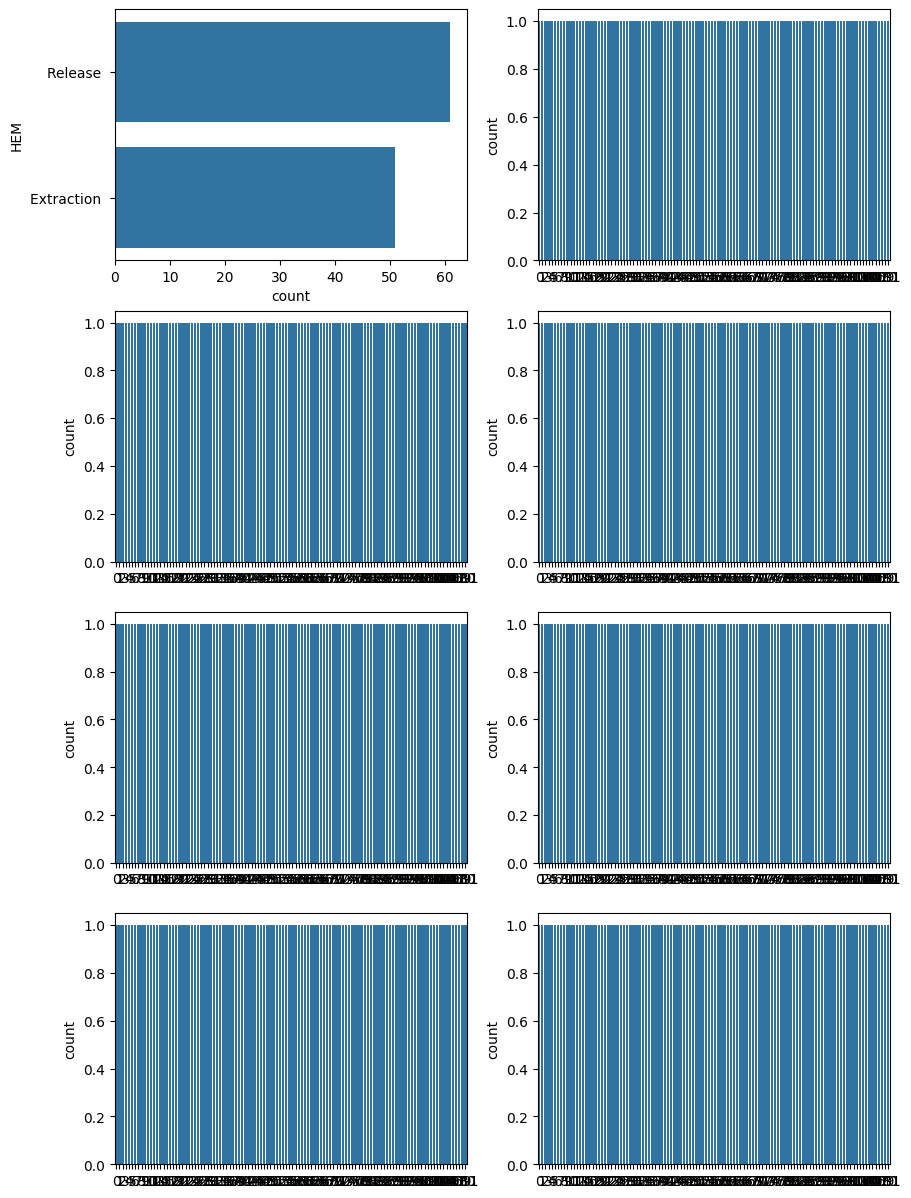

In [5]:
# 4. Distribución de las variables
cols = dataset.columns
fig, axes = plt.subplots(4,2, figsize = (10,15))
k = 0

for i in range(4):
    for j in range(2):
        sns.countplot(dataset[cols[k]], ax = axes[i][j])
        k = k + 1

<Axes: >

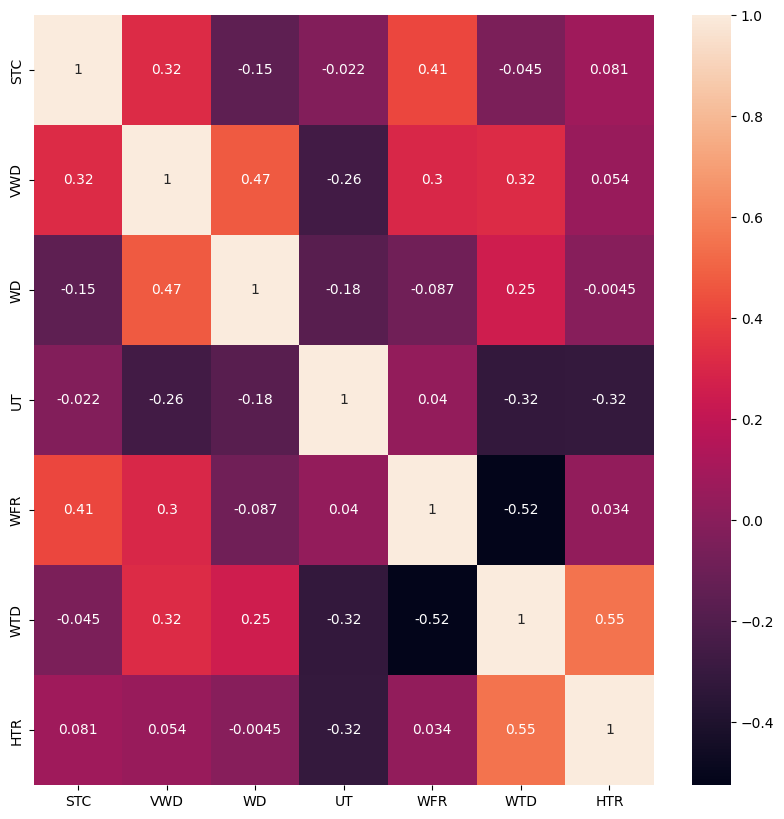

In [6]:
# 5. Cálculo de la matriz de correlación
fig = plt.figure(figsize = (10,10))
sns.heatmap(dataset[dataset.keys().drop('HEM')].corr(), annot = True)

In [7]:
X = dataset[dataset.keys().drop(['HEM','HTR'])]
y = np.asarray(dataset['HTR'])

In [8]:
scaler = preprocessing.MinMaxScaler(feature_range = (0.1, 0.9))
    
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [9]:
n_neurons = 5
model = Sequential(name = "Model-with-Six-Input") # Model
model.add(Input(shape=(X.shape[1],), name = 'Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model.add(Dense(n_neurons, activation='sigmoid', name = 'Hidden-Layer')) # Hidden Layer
model.add(Dense(1, activation = 'linear', name = 'Output-Layer')) # Output Layer}
model.summary()

2024-07-26 03:36:23.641752: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-26 03:36:23.844162: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "Model-with-Six-Input"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 5)              │            35 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
#%% Compile keras model
model.compile(optimizer = 'sgd', # default='rmsprop', an algorithm to be used in backpropagation
                loss = 'mean_squared_error', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
                metrics = ['mean_squared_error','mean_absolute_error'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
                )

In [11]:
#%% Fit keras model on the dataset
earlyStopping = EarlyStopping(monitor = 'mean_squared_error',
                                patience = 20,
                                verbose = 0,
                                mode ='min')

mcp_save = ModelCheckpoint('best_model.keras',
                            save_best_only = True,
                            monitor = 'mean_squared_error',
                            mode = 'min')

In [12]:
history = model.fit(X_train, # input data
                    y_train, # target data
                    batch_size = 10, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
                    epochs = 3500, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
                    verbose = 'auto', # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
                    callbacks = [earlyStopping, mcp_save],
                    validation_data = (X_test, y_test))

Epoch 1/3500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1688 - mean_absolute_error: 0.3731 - mean_squared_error: 0.1688 - val_loss: 0.1005 - val_mean_absolute_error: 0.2766 - val_mean_squared_error: 0.1005
Epoch 2/3500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0922 - mean_absolute_error: 0.2537 - mean_squared_error: 0.0922 - val_loss: 0.0539 - val_mean_absolute_error: 0.1928 - val_mean_squared_error: 0.0539
Epoch 3/3500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0603 - mean_absolute_error: 0.1965 - mean_squared_error: 0.0603 - val_loss: 0.0367 - val_mean_absolute_error: 0.1552 - val_mean_squared_error: 0.0367
Epoch 4/3500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0391 - mean_absolute_error: 0.1589 - mean_squared_error: 0.0391 - val_loss: 0.0298 - val_mean_absolute_error: 0.1373 - val_mean_squared_error: 0.0298
Epoch 5/3500
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0397 - mean_absolute_error: 0.1669 - mean_squared_error: 0.0397 - val_loss: 0.0272 - val_mean_absol

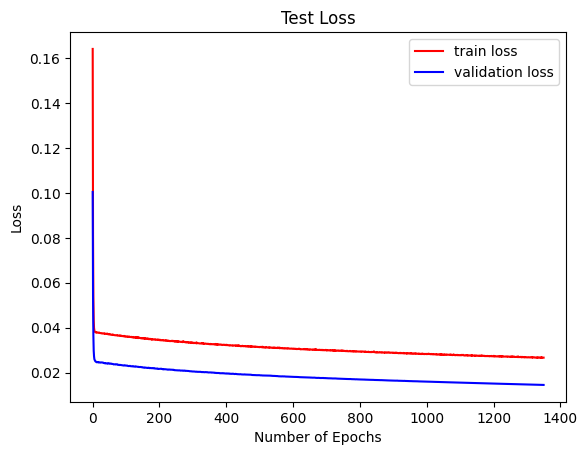

In [13]:
#%% Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['loss'], color = 'r', label = "train loss")
plt.plot(history.history['val_loss'], color = 'b', label = "validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [14]:
#%% Use model to make predictions
# Predict on training data
pred_tr = model.predict(X_train)

# Predict on a test data
pred_te = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [15]:
def regression_results(y_true, y_pred):
    # Regression metrics
    ev = explained_variance_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred) 
    mse = mean_squared_error(y_true, y_pred) 
    r2 = r2_score(y_true, y_pred)

    print('explained_variance: ', round(ev,4))    
    print('MAE: ', round(mae,4))
    print('MSE: ', round(mse,4))
    print('R²: ', round(r2,4))

In [16]:
print("")
print('---------- Evaluation on Training Data ----------')
regression_results(y_train, pred_tr)
print("")

print('---------- Evaluation on Test Data ----------')
regression_results(y_test, pred_te)
print("")

#%% Model Performance Summary
# from tensorflow import keras
# best_model = keras.models.load_model('best_model.hdf5')

# print("")
# print('-------------------- Model Summary --------------------')
# best_model.summary() # print model summary

# print("")
# print('-------------------- Weights and Biases --------------------')

# for layer in model.layers:
#     print("Layer: ", layer.name) # print layer name
#     print("  --Kernels (Weights): ", layer.get_weights()[0]) # kernels (weights)
#     print("  --Biases: ", layer.get_weights()[1]) # biases

# print("")
# print('---------- Evaluation on Training Data ----------')
# regression_results(y_train, pred_tr)
# print("")

# print('---------- Evaluation on Test Data ----------')
# regression_results(y_test, pred_te)
# print("")


---------- Evaluation on Training Data ----------
explained_variance:  0.1817
MAE:  0.1385
MSE:  0.0265
R²:  0.1816

---------- Evaluation on Test Data ----------
explained_variance:  0.2044
MAE:  0.101
MSE:  0.0145
R²:  0.2043



In [17]:
#%% Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model.summary() # print model summary

print("")
print('-------------------- Weights and Biases --------------------')

for layer in model.layers:
    print("Layer: ", layer.name) # print layer name
    print("  --Kernels (Weights): ", layer.get_weights()[0]) # kernels (weights)
    print("  --Biases: ", layer.get_weights()[1]) # biases


-------------------- Model Summary --------------------


Model: "Model-with-Six-Input"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer (Dense)            │ (None, 5)              │            35 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43 (176.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)


-------------------- Weights and Biases --------------------
Layer:  Hidden-Layer
  --Kernels (Weights):  [[ 0.36167505  0.49059024  0.04235549  0.17851661  0.33277908]
 [-0.65256655  0.6424151   0.49294963  0.21197596  0.58716804]
 [-0.52653486  0.30755156  0.31538    -0.4461142  -0.49935636]
 [ 0.40127668 -0.13171709 -0.44368467 -0.39800766  0.02997286]
 [-0.5237422   0.6400293   0.24124819  0.34675872 -0.5824352 ]
 [ 0.9838279   0.10423114  0.23469603 -0.35981414  0.56213826]]
  --Biases:  [-0.02262097 -0.00999288 -0.05335375  0.02961579 -0.00219402]
Layer:  Output-Layer
  --Kernels (Weights):  [[ 0.5728813 ]
 [ 0.546393  ]
 [ 0.5494772 ]
 [-0.50066847]
 [ 0.13345505]]
  --Biases:  [-0.350685]
